<a href="https://colab.research.google.com/github/IR04dy/NN/blob/main/VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://arxiv.org/pdf/1409.1556.pdf


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_24 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 conv2d_25 (Conv2D)          (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 128, 128, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 conv2d_27 (Conv2D)          (None, 128, 128, 128)     147584    
                                                           

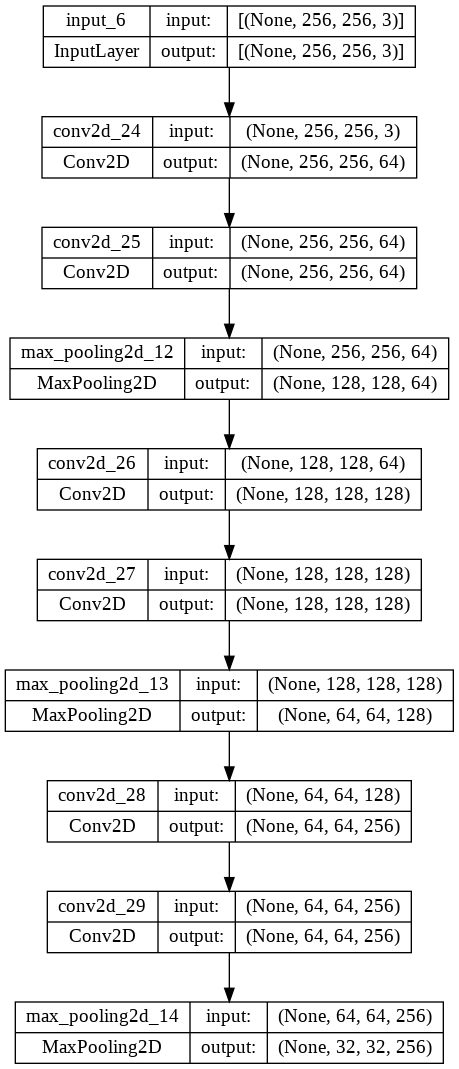

In [ ]:
from keras.layers.pooling.max_pooling2d import MaxPooling2D
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import GlobalMaxPooling2D
from keras.utils import plot_model


def vgg_block(layer_in, n_filters, n_conv):

  for _ in range(n_conv):
    layer_in = Conv2D(n_filters, (3,3), padding='same', activation='relu')(layer_in)

  layer_in = MaxPooling2D((2,2), strides=(2,2))(layer_in)
  return layer_in

visible = Input(shape=(256,256,3))

layer = vgg_block(visible, 64, 2)

layer = vgg_block(layer, 128, 2)

layer = vgg_block(layer, 256, 2)

model = Model(inputs=visible, outputs=layer)

model.summary()

plot_model(model, show_shapes=True, to_file='multiple_vgg_blocks.png')

